In [1]:
# INSTALL AND LOAD PACKAGES ################################

# Install pacman if you don't have it (uncomment next line)
# install.packages("pacman")

# Install and/or load packages with pacman
pacman::p_load(    # Use p_load function from pacman
  car,             # scatterplotMatrix  
  cluster,         # Cluster analysis
  factoextra,      # Evaluate clusters
  magrittr,        # Pipes
  pacman,          # Load/unload packages
  rio,             # Import/export data
  tidyverse        # So many reasons
)

also installing the dependencies ‘corrplot’, ‘viridis’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’





The downloaded binary packages are in
	/var/folders/rh/pfd6hrw52s35skb7d44l36nr0000gn/T//RtmpCXQlhS/downloaded_packages



factoextra installed



In [2]:
# LOAD AND PREPARE DATA ####################################

# Use the `penguins` dataset that was wrangled previously 
# in "Penguins.R."

# Set random seed for reproducibility in processes like
# splitting the data
set.seed(1)  # You can use any number here

# Import data and sample
df <- import("data/penguins.rds") %>%
  sample_n(100)  # Reduce n for graphing

In [3]:
# Look at the first few rows of the prepared data frame
df

y,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
<fct>,<dbl>,<dbl>,<int>,<int>
Chinstrap,49.8,17.3,198,3675
Gentoo,49.3,15.7,217,5850
Adelie,44.1,18.0,210,4000
Chinstrap,46.7,17.9,195,3300
Gentoo,47.2,13.7,214,4925
Gentoo,48.4,16.3,220,5400
Chinstrap,42.5,16.7,187,3350
Adelie,41.3,20.3,194,3550
Chinstrap,51.3,19.2,193,3650


In [4]:
# Separate the class labels
y <- df %>% 
  pull(y)    # Select just `y` as a vector

In [5]:
df %<>% 
  select(-y) %>%  # Select everything except `y`
  scale()         # Standardize variables

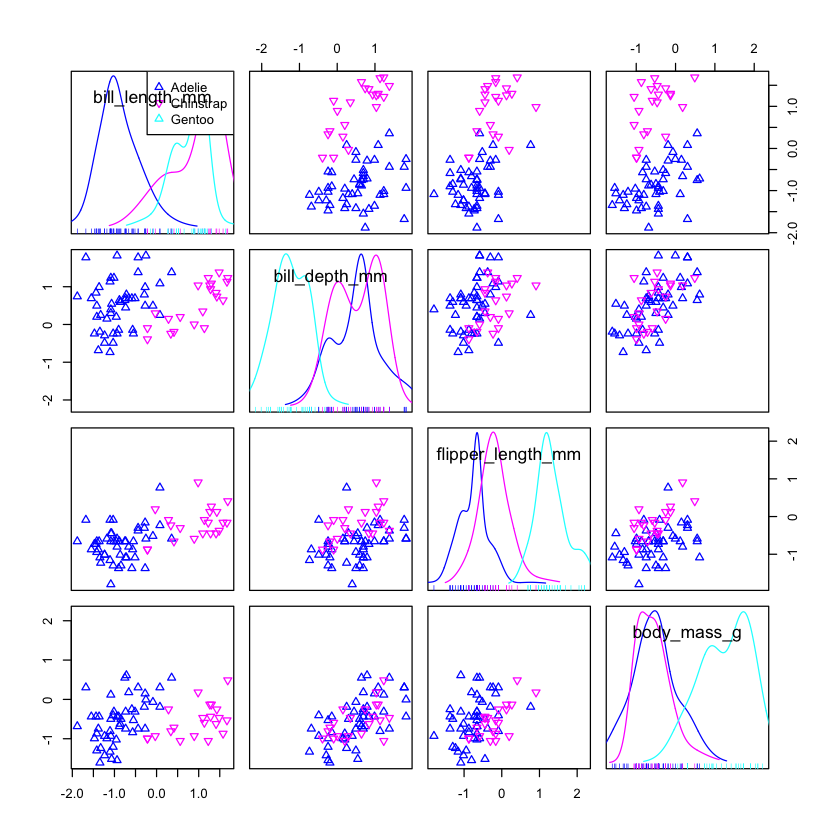

In [6]:
# EXPLORE DATA #############################################

# Make a scatter plot of some exploratory variables and
# color according to species (y)
scatterplotMatrix(
  ~ bill_length_mm +
    bill_depth_mm +
    flipper_length_mm +
    body_mass_g | 
    y,
  data = df,
  regLine = FALSE, 
  smooth  = FALSE,
  pch = c(2, 6)
)

In [7]:
# HIERARCHICAL CLUSTERING ##################################

# Calculate clusters
hc <- df %>%    # Get data
  dist %>%      # Compute distance/dissimilarity matrix
  hclust        # Compute hierarchical clusters

hc$labels <- y  # Set the class labels

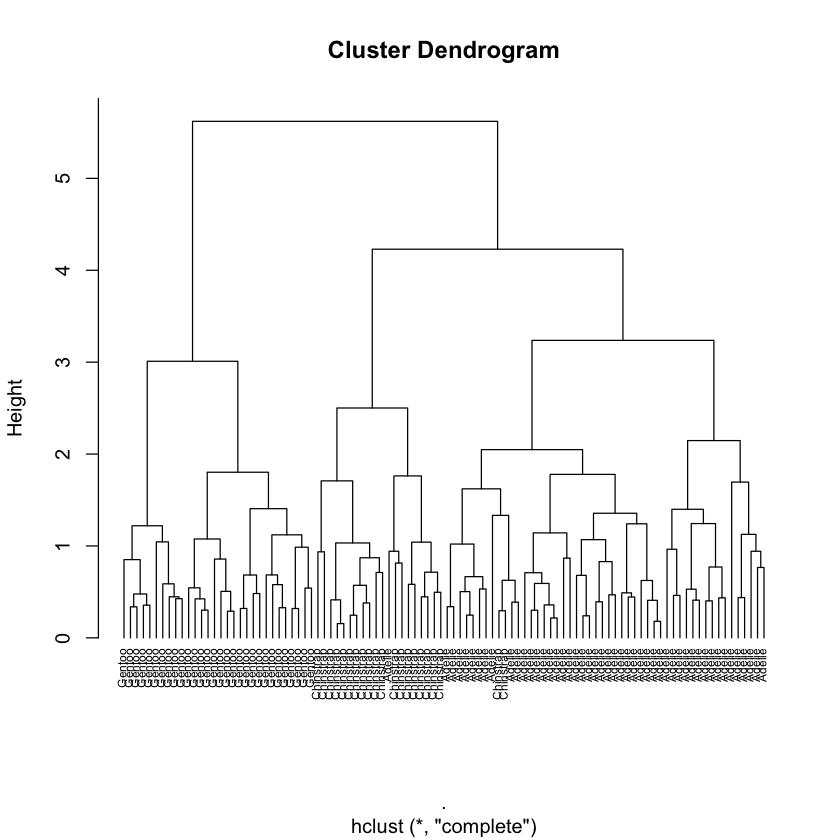

In [8]:
# Plot the dendrogram
hc %>% plot(    # Generic X-Y plotting
  hang = -1,    # Line up names at bottom
  cex = 0.6     # Make font smaller
)

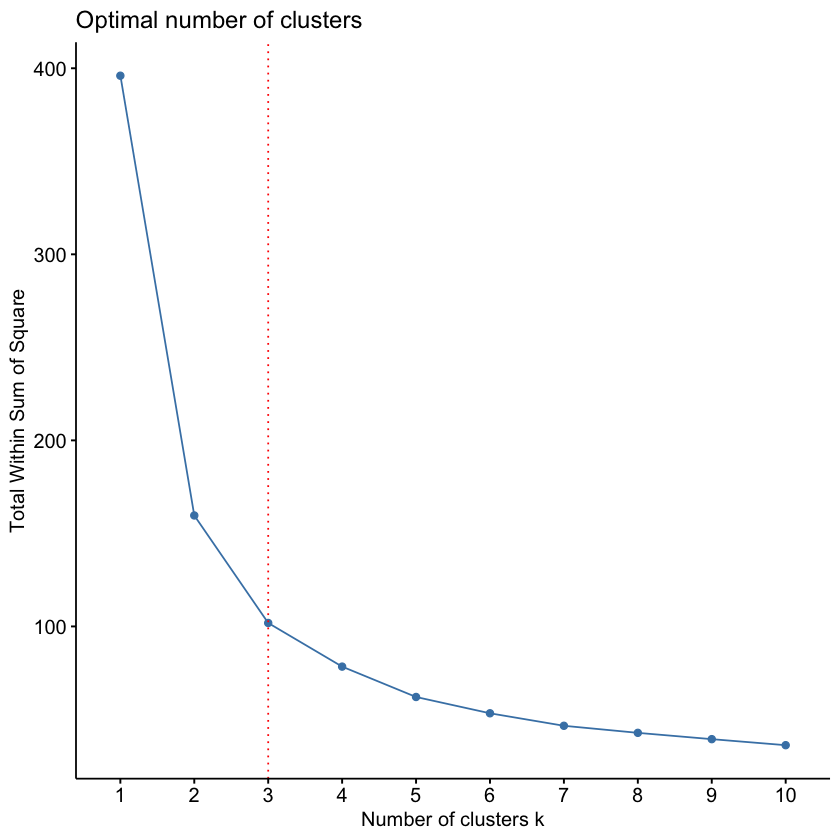

In [9]:
# OPTIMAL NUMBER OF CLUSTERS ###############################

# Elbow method
df %>%
  fviz_nbclust(          # From factoextra
    FUN = hcut,          # Method for clustering
    method = "wss"       # "within cluster sums of squares"
  ) +
  geom_vline(            # Reference line
    xintercept = 3,      # Draw line at X = 3
    color = "red",       # Color red
    linetype = "dotted"  # Use dotted line
  )                      # Look for "bend" in curve

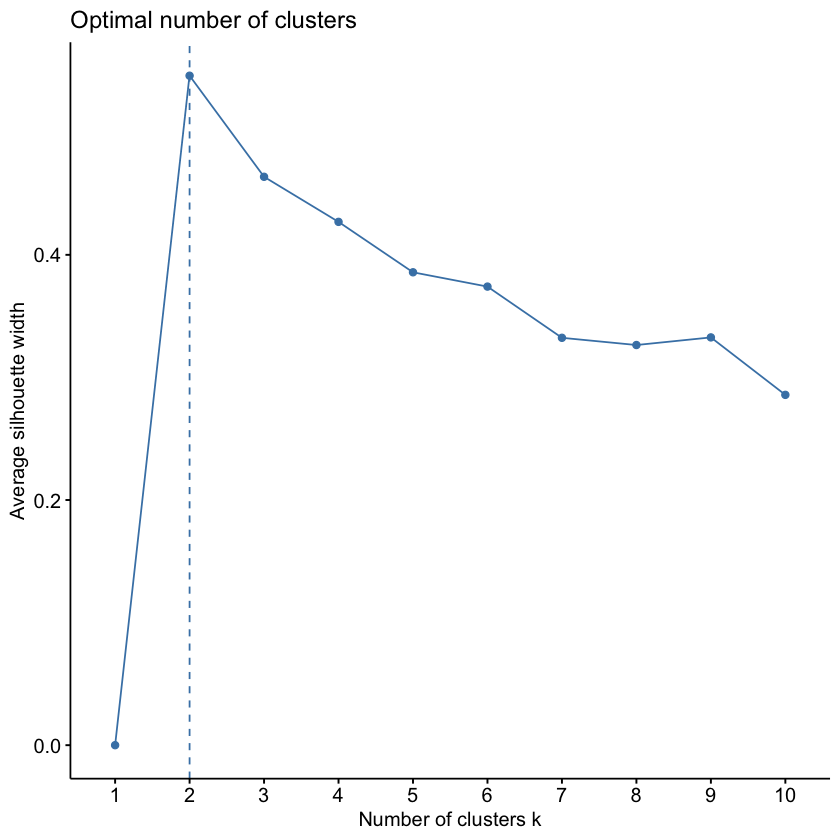

In [10]:
# Silhouette method
df %>%
  fviz_nbclust(
    FUN = hcut,
    method = "silhouette"  # Look for maximum width
  )

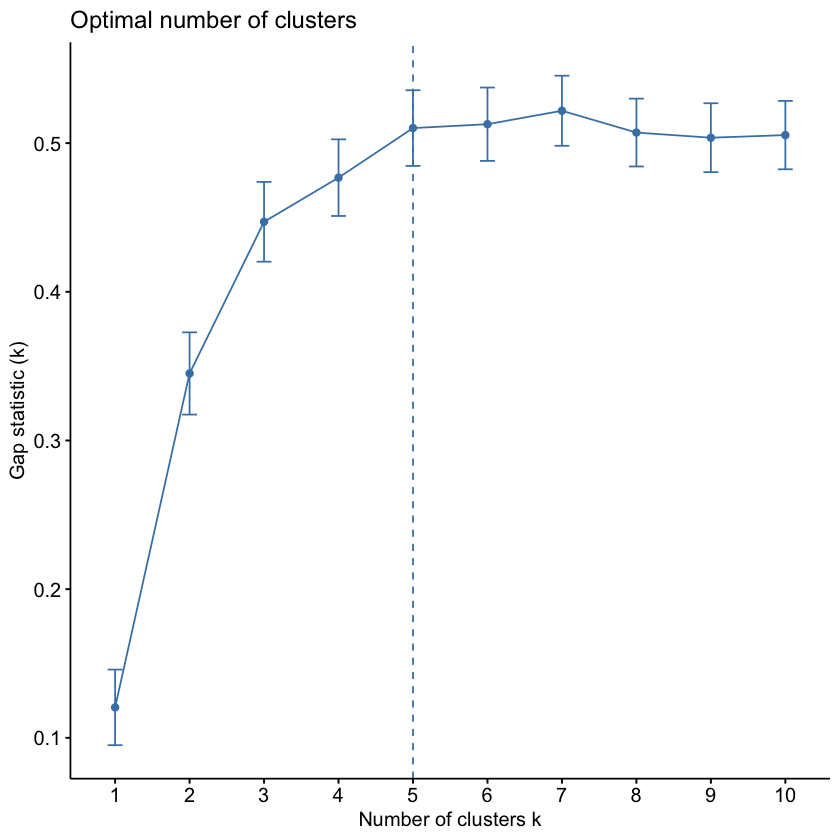

In [11]:
# Gap method: This compares the total intracluster variation
# for values of k with their expected values from null
# distributions (from Monte Carlo simulations)
df %>%
  clusGap(           # Function from `cluster`
    FUN = hcut,      # Method for clustering
    K.max = 10,      # Maximum number of clusters
    B = 100          # n Monte Carlo/bootstrap samples
  ) %>%
  fviz_gap_stat()    # Look for highest value

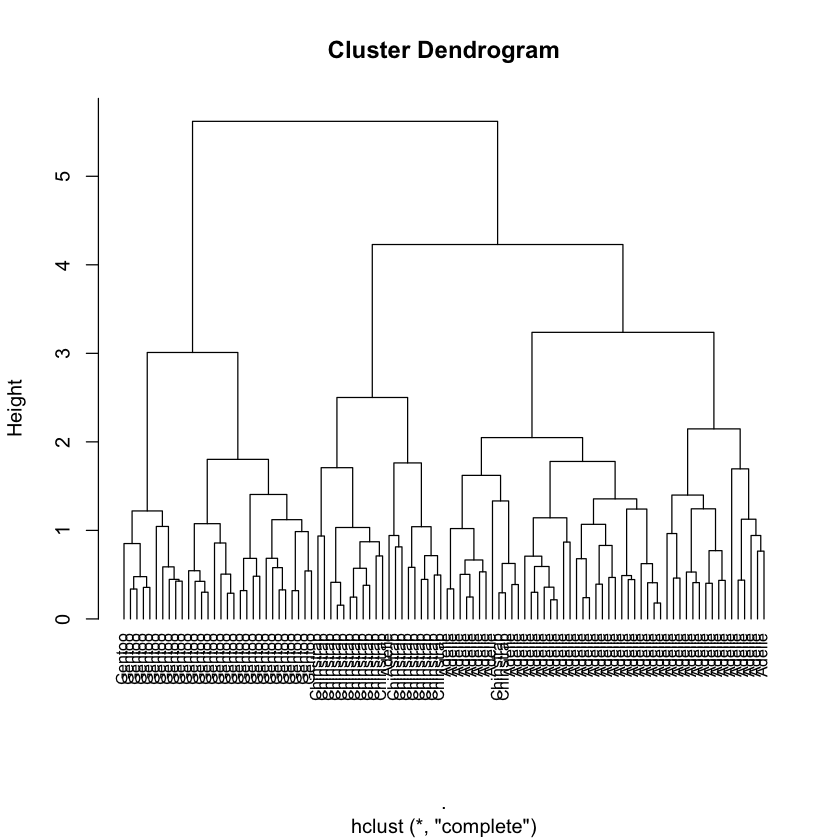

In [17]:
# HIERARCHICAL CLUSTERING ##################################

# Plot dendrogram (again) 
hc %>% plot(         # Generic X-Y plotting
  hang = -1,         # Line up names at bottom
  cex = 0.8          # Make font smaller
)

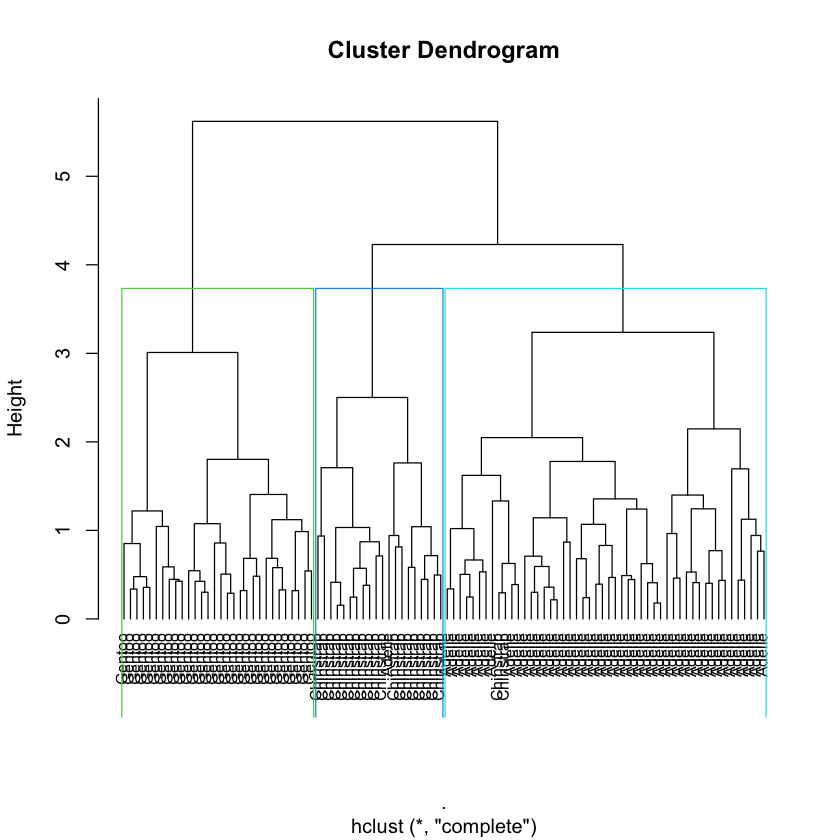

In [18]:
# Plot dendrogram (again) 
hc %>% plot(         # Generic X-Y plotting
  hang = -1,         # Line up names at bottom
  cex = 0.8          # Make font smaller
)
# Draw boxes around clusters
hc %>% rect.hclust(  # Add rectangles to clusters
  k = 3,             # Draw three rectangles
  border = 3:5       # Use colors 3 through 5
)

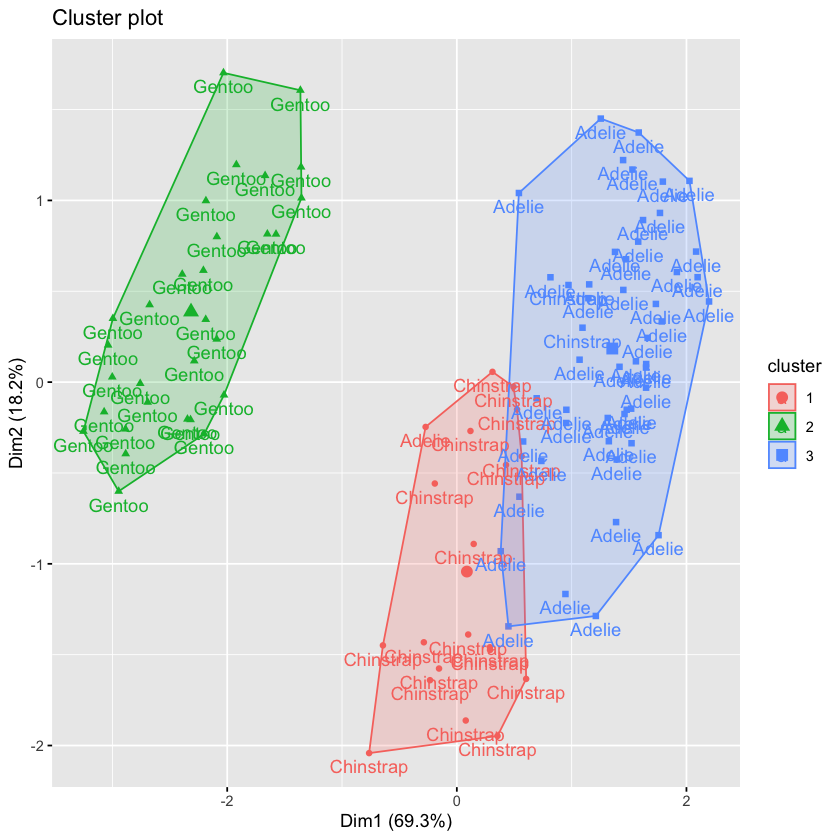

In [22]:
# Fit the hierarchical clustering groups to data
y_hc <- hc %>% cutree(3)

# Visualize the clusters in 2-D space; label points
# according to species and color points according to
# assigned cluster
fviz_cluster(
  list(
    cluster = y_hc,
    data = df
  ),
  geom = c("point")
) + 
geom_text(
  vjust = 1.5,  # Label points
  aes(
    color = as.factor(y_hc), 
    label = hc$labels
  )
)